## Exploratory Analysis
Để bắt đầu phân tích khám phá, đầu tiên sử dụng `matplotlib` để nhập các thư viện và thể hiện các biểu đồ để vẽ dữ liệu

In [1]:
import matplotlib.pyplot as plt # vẽ biểu đồ
import plotly.express as px # vẽ biểu đồ
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # vẽ biểu đồ


Dựng sẵn 1 vài hàm để vẽ biểu đồ trước

In [2]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

Đọc file data

In [3]:
nRowsRead = None
df1 = pd.read_csv('housing.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'housing.csv'
nRow, nCol = df1.shape
print(f'Có {nRow} rows và {nCol} columns')

There are 20640 rows and 10 columns


Nhìn qua Data, thể hiện được những gì

In [4]:
df1.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
df1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

XÓA NULL

In [6]:
df1.dropna(inplace=True)

### Giải thích:
1. longitude: kinh độ
2. latitude: vĩ độ
3. housingMedianAge: Tuổi của ngôi nhà
4. totalRooms: số phòng trong 1 block
5. totalBedrooms: số phòng ngủ trong 1 block
6. population: Số người trong 1 block
7. households: Số hộ dân trong 1 block
8. medianIncome: Trung bình thu nhập của cư dân ở trong blokc (10.000 US Dollars)
9. medianHouseValue: Trung bình giá nhà (measured in US Dollars)
10. oceanProximity: Khoảng cách so với biển

Distribution graphs (histogram/bar graph) of sampled columns:

In [7]:
countValue = df1['ocean_proximity'].value_counts().reset_index()
fig = px.bar(countValue, x='ocean_proximity', y='count', color='ocean_proximity', title='Count of ocean_proximity')
fig.show()

Chủ yếu ở gần biển

In [8]:
countValue = df1['housing_median_age'].value_counts().reset_index()
fig = px.bar(countValue, x='housing_median_age', y='count', color='housing_median_age', title='Count of housingMedianAge')
fig.show()

In [9]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Phân bố đồng đều , nhiều nhà cao tuổi, cũ

In [10]:
data = df1.copy()
data["total_bedrooms"] = (data["total_bedrooms"].astype(int) // 100) * 100
countValue = data['total_bedrooms'].value_counts().reset_index()
fig = px.bar(countValue, x='total_bedrooms', y='count', color='total_bedrooms', title='Count of total_bedrooms')
fig.show()
fig2 = px.box(df1, x='total_bedrooms')
fig2.show()
df1.drop(df1[df1['total_bedrooms'] > 4000].index, inplace = True)
fig2 = px.box(df1, x='total_bedrooms')
fig2.show()

Xóa các giá trị outlier

In [11]:
data = df1.copy()
data["total_rooms"] = (data["total_rooms"].astype(int) // 100) * 100
countValue = data['total_rooms'].value_counts().reset_index()
fig = px.bar(countValue, x='total_rooms', y='count', color='total_rooms', title='Count of total_rooms')
fig.show()
fig2 = px.box(df1, x='total_rooms')
fig2.show()
df1.drop(df1[df1['total_rooms'] > 8000].index, inplace = True)
fig2 = px.box(df1, x='total_rooms')
fig2.show()

In [12]:
data = df1.copy()
data["population"] = (data["population"].astype(int) // 100) * 100
countValue = data['population'].value_counts().reset_index()
fig = px.bar(countValue, x='population', y='count', color='population', title='Count of total_bedrooms')
fig.show()
fig2 = px.box(df1, x='population')
fig2.show()
df1.drop(df1[df1['population'] > 5000].index, inplace = True)
fig2 = px.box(df1, x='population')
fig2.show()

In [13]:
data = df1.copy()
data["households"] = (data["households"].astype(int) // 10) * 10
countValue = data['households'].value_counts().reset_index()
fig = px.bar(countValue, x='households', y='count', color='households', title='Count of total_bedrooms')
fig.show()
fig2 = px.box(df1, x='households')
fig2.show()
df1.drop(df1[df1['households'] > 906].index, inplace = True)
fig2 = px.box(df1, x='households')
fig2.show()


In [14]:
data = df1.copy()
data["median_income"] = data["median_income"].round(1)
countValue = data['median_income'].value_counts().reset_index()
fig = px.bar(countValue, x='median_income', y='count', color='median_income', title='Count of median_income')
fig.show()
fig2 = px.box(df1, x='median_income')
fig2.show()

In [15]:
data = df1.copy()
data["median_house_value"] = data["median_house_value"].round(-4)
countValue = data['median_house_value'].value_counts().reset_index()
fig = px.bar(countValue, x='median_house_value', y='count', color='median_house_value', title='Count of median_house_value')
fig.show()
fig2 = px.box(df1, x='median_income')
fig2.show()

Sau khi loại bỏ outlier kiểm lại shape của data

In [16]:
df1.shape

(18450, 10)

Correlation matrix:

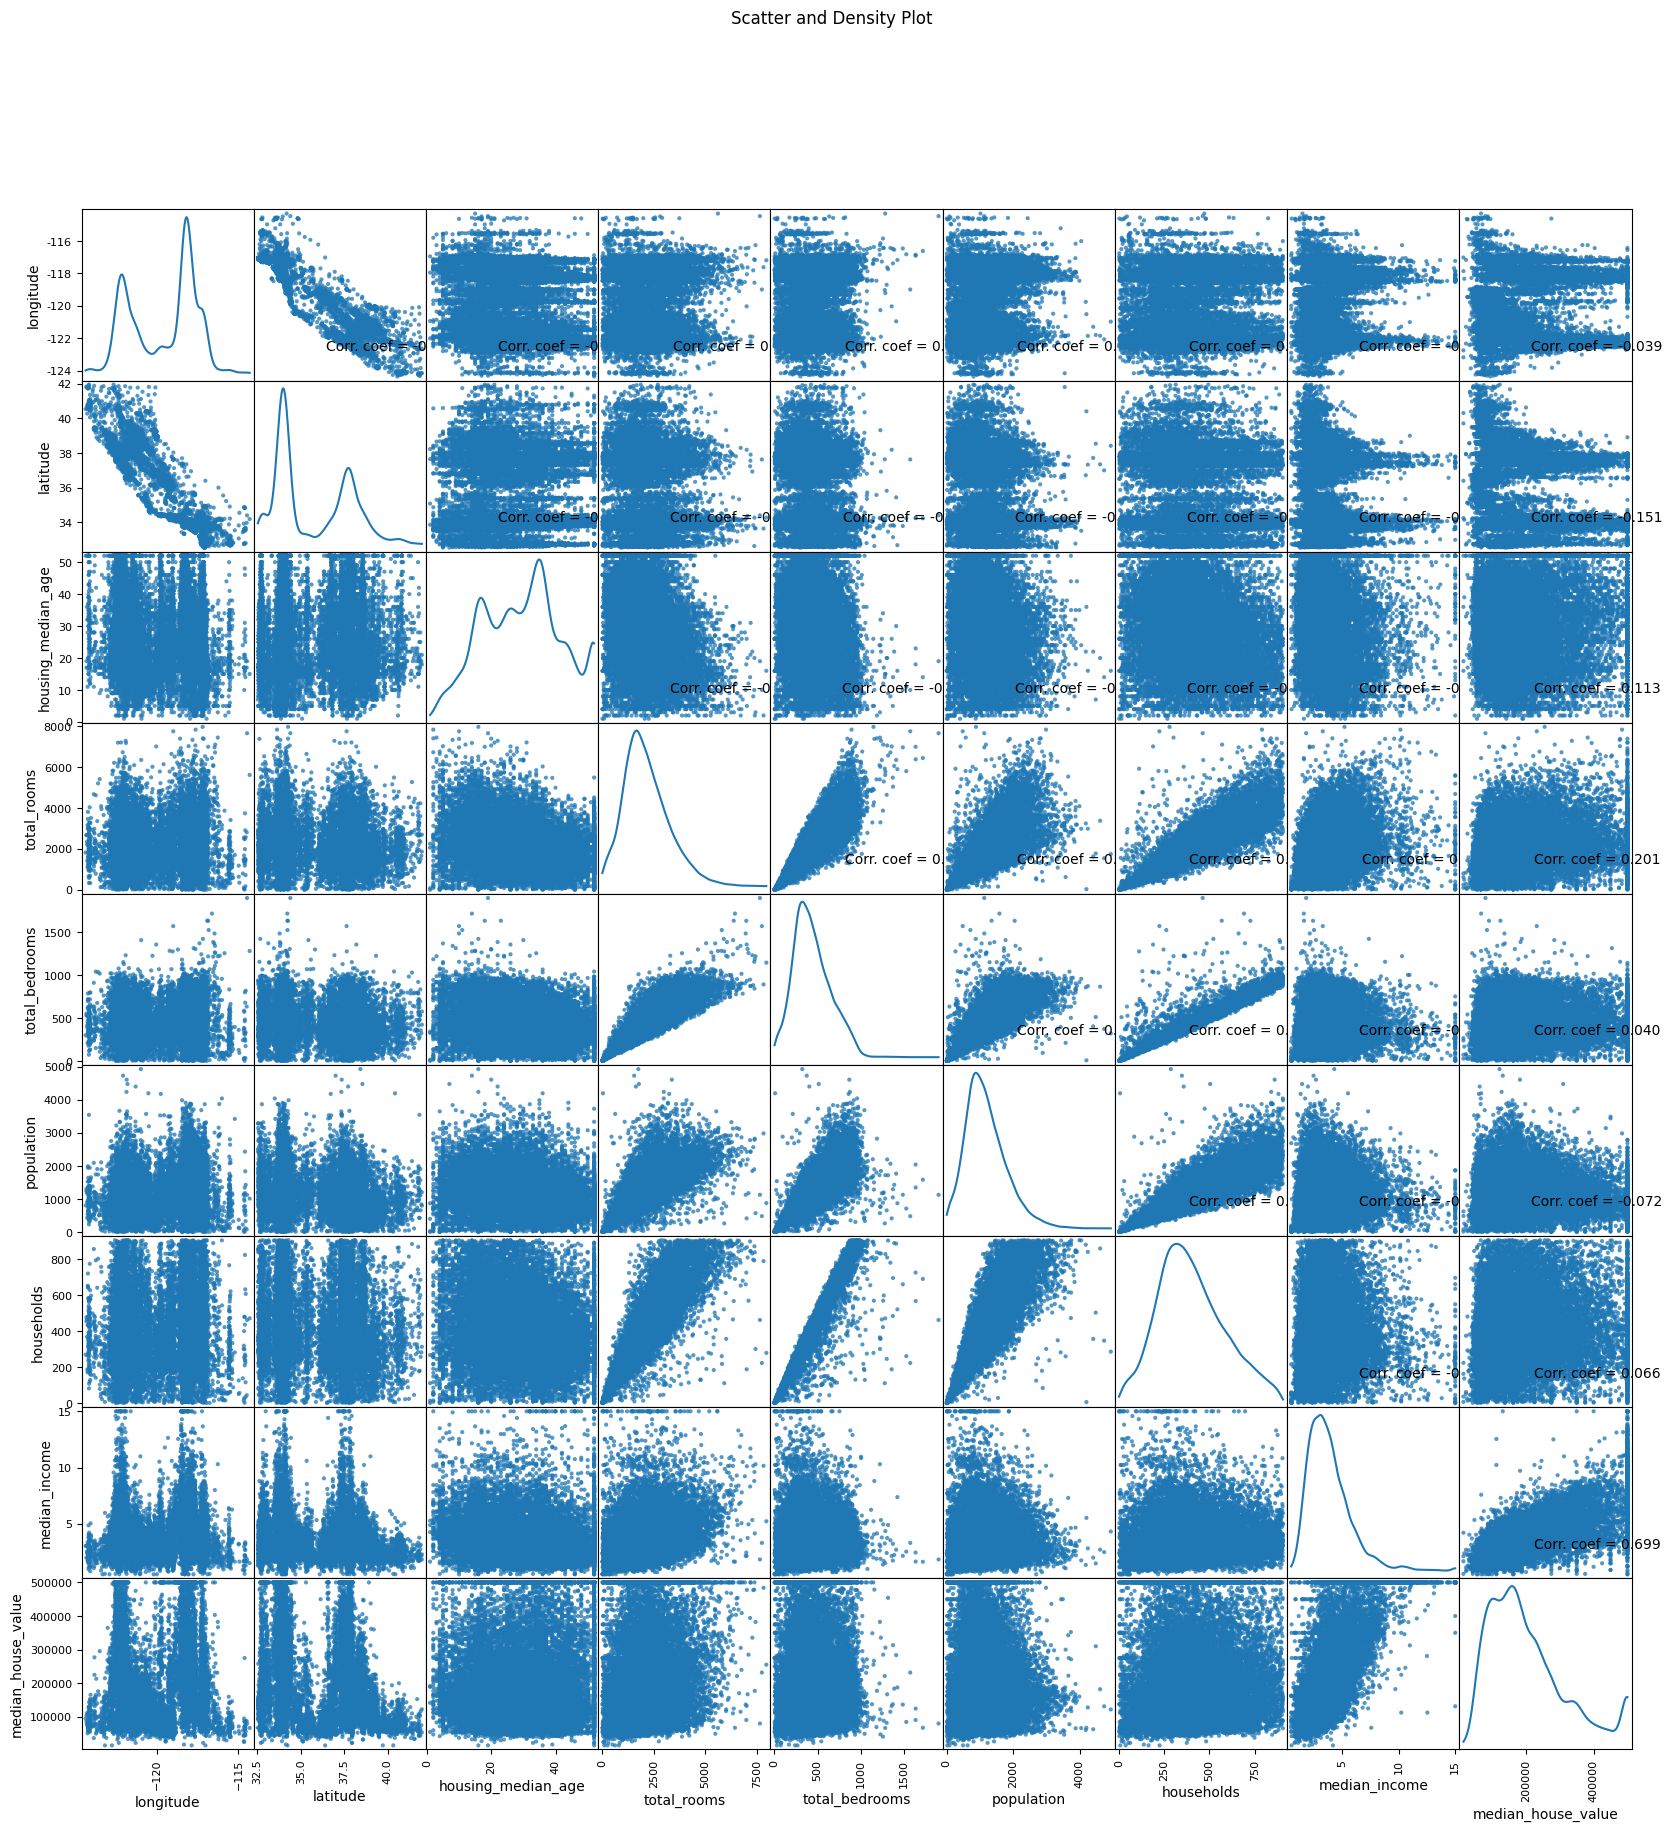

In [17]:
plotScatterMatrix(df1, 20, 10)

# PHẦN DỰ ĐOÁN

In [18]:
#Import important modules:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline  
import random
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.simplefilter("ignore")

Bỏ qua các cảnh báo của hệ thống

CHUYỂN ĐỔI CỘT KHÔNG PHÙ HỢP THÀNH DẠNG BOOL

In [19]:
for col in df1.columns:
  if df1[col].dtype == 'object':
    dummies = pd.get_dummies(df1[col], prefix=col) 
    df1 = df1.join(dummies)

df1 = df1.drop('ocean_proximity', axis=1)

# PHÂN PHỐI TRÊN BẢN ĐỒ

In [20]:
geomap = px.scatter_mapbox(df1, lat = 'latitude', lon = 'longitude', color = 'median_house_value', mapbox_style = 'open-street-map', hover_name = 'population', hover_data = ['median_house_value'], width = 1000, height = 1000)
geomap.show()

Từ biểu đồ này, tôi có thể thấy rằng các bất động sản gần bờ biển California (đặc biệt là gần San Francisco và Los Angeles) có giá trị nhà trung bình cao nhất. Các bất động sản ở sâu hơn bên trong gần các dãy núi có giá trị nhà trung bình gần 50-100 nghìn đô la.

In [21]:
df = df1[df1['ocean_proximity_NEAR BAY']==1]
geomap = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', color = 'housing_median_age', mapbox_style = 'open-street-map', hover_name = 'population', hover_data = ['housing_median_age'], width = 1000, height = 1000)
geomap.show()
countValue = df['housing_median_age'].value_counts().reset_index()
fig = px.bar(countValue, x='housing_median_age', y='count', color='housing_median_age', title='Count of housingMedianAge')
fig.show()

In [22]:
from sklearn.model_selection import train_test_split

#separate response and predictors
x = df1.drop('median_house_value', axis = 1)
y = df1['median_house_value']

print(df1.dtypes)
#Either true, or false for ocean_proximity

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, train_size = 0.6, random_state = 21)

#Model 1:
#Train dựa trên input số
numeric_features = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
model = LinearRegression().fit(x_train[numeric_features], y_train)
trainscore = model.score(x_train[numeric_features], y_train)
testscore = model.score(x_test[numeric_features], y_test)
print("Model 1(R^2):", trainscore, testscore)


#Model 2
#Train dựa trên biến TrueFalse
x_train_new = pd.get_dummies(x_train, drop_first=True)
x_test_new = pd.get_dummies(x_test, drop_first = True)
x_train_new.dtypes

model2 = LinearRegression().fit(x_train_new, y_train)
trainscore = model2.score(x_train_new, y_train)
testscore = model2.score(x_test_new, y_test)
print("Model 2(R^2):", trainscore, testscore)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object
Model 1(R^2): 0.6350618546535398 0.6568550452794385
Model 2(R^2): 0.6535857017609823 0.6769108080341326


In [23]:
train_data = df1.sample(frac=0.8, random_state=0)

<Axes: >

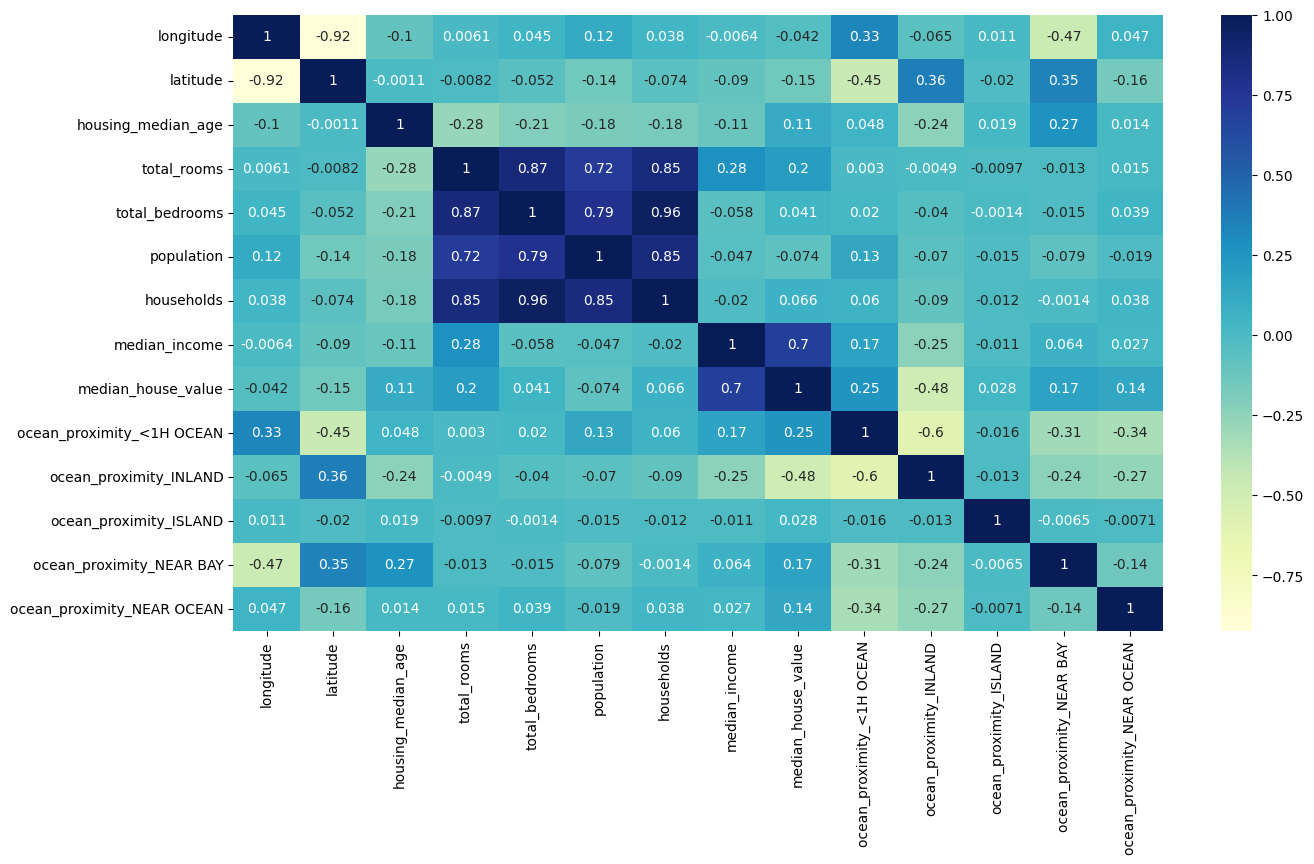

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

Thử nghiệm kết quả model

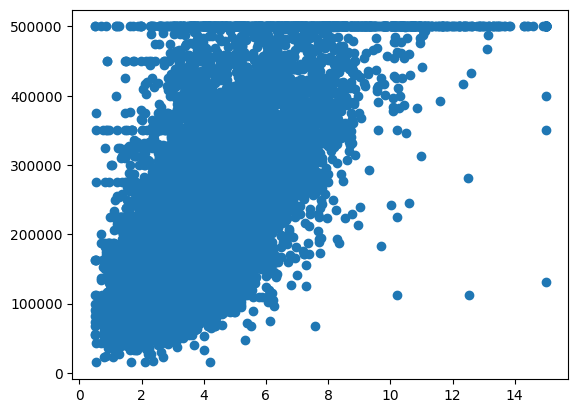

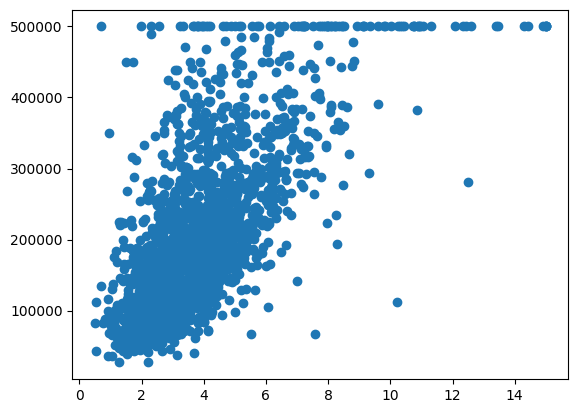

In [25]:
#predictor (x) variable: Vì corr cao nhất là với median_income nên ta sẽ lấy nó làm predictor
x = df1[['median_income']]

#response (y) variable:
y = df1['median_house_value']

plt.scatter(x,y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 21)

sample_size = 2000
indices = random.sample(range(len(x_train)), sample_size)
x_randomed = x_train.iloc[indices]
y_randomed = y_train.iloc[indices]

plt.scatter(x_randomed, y_randomed)
plt.show()

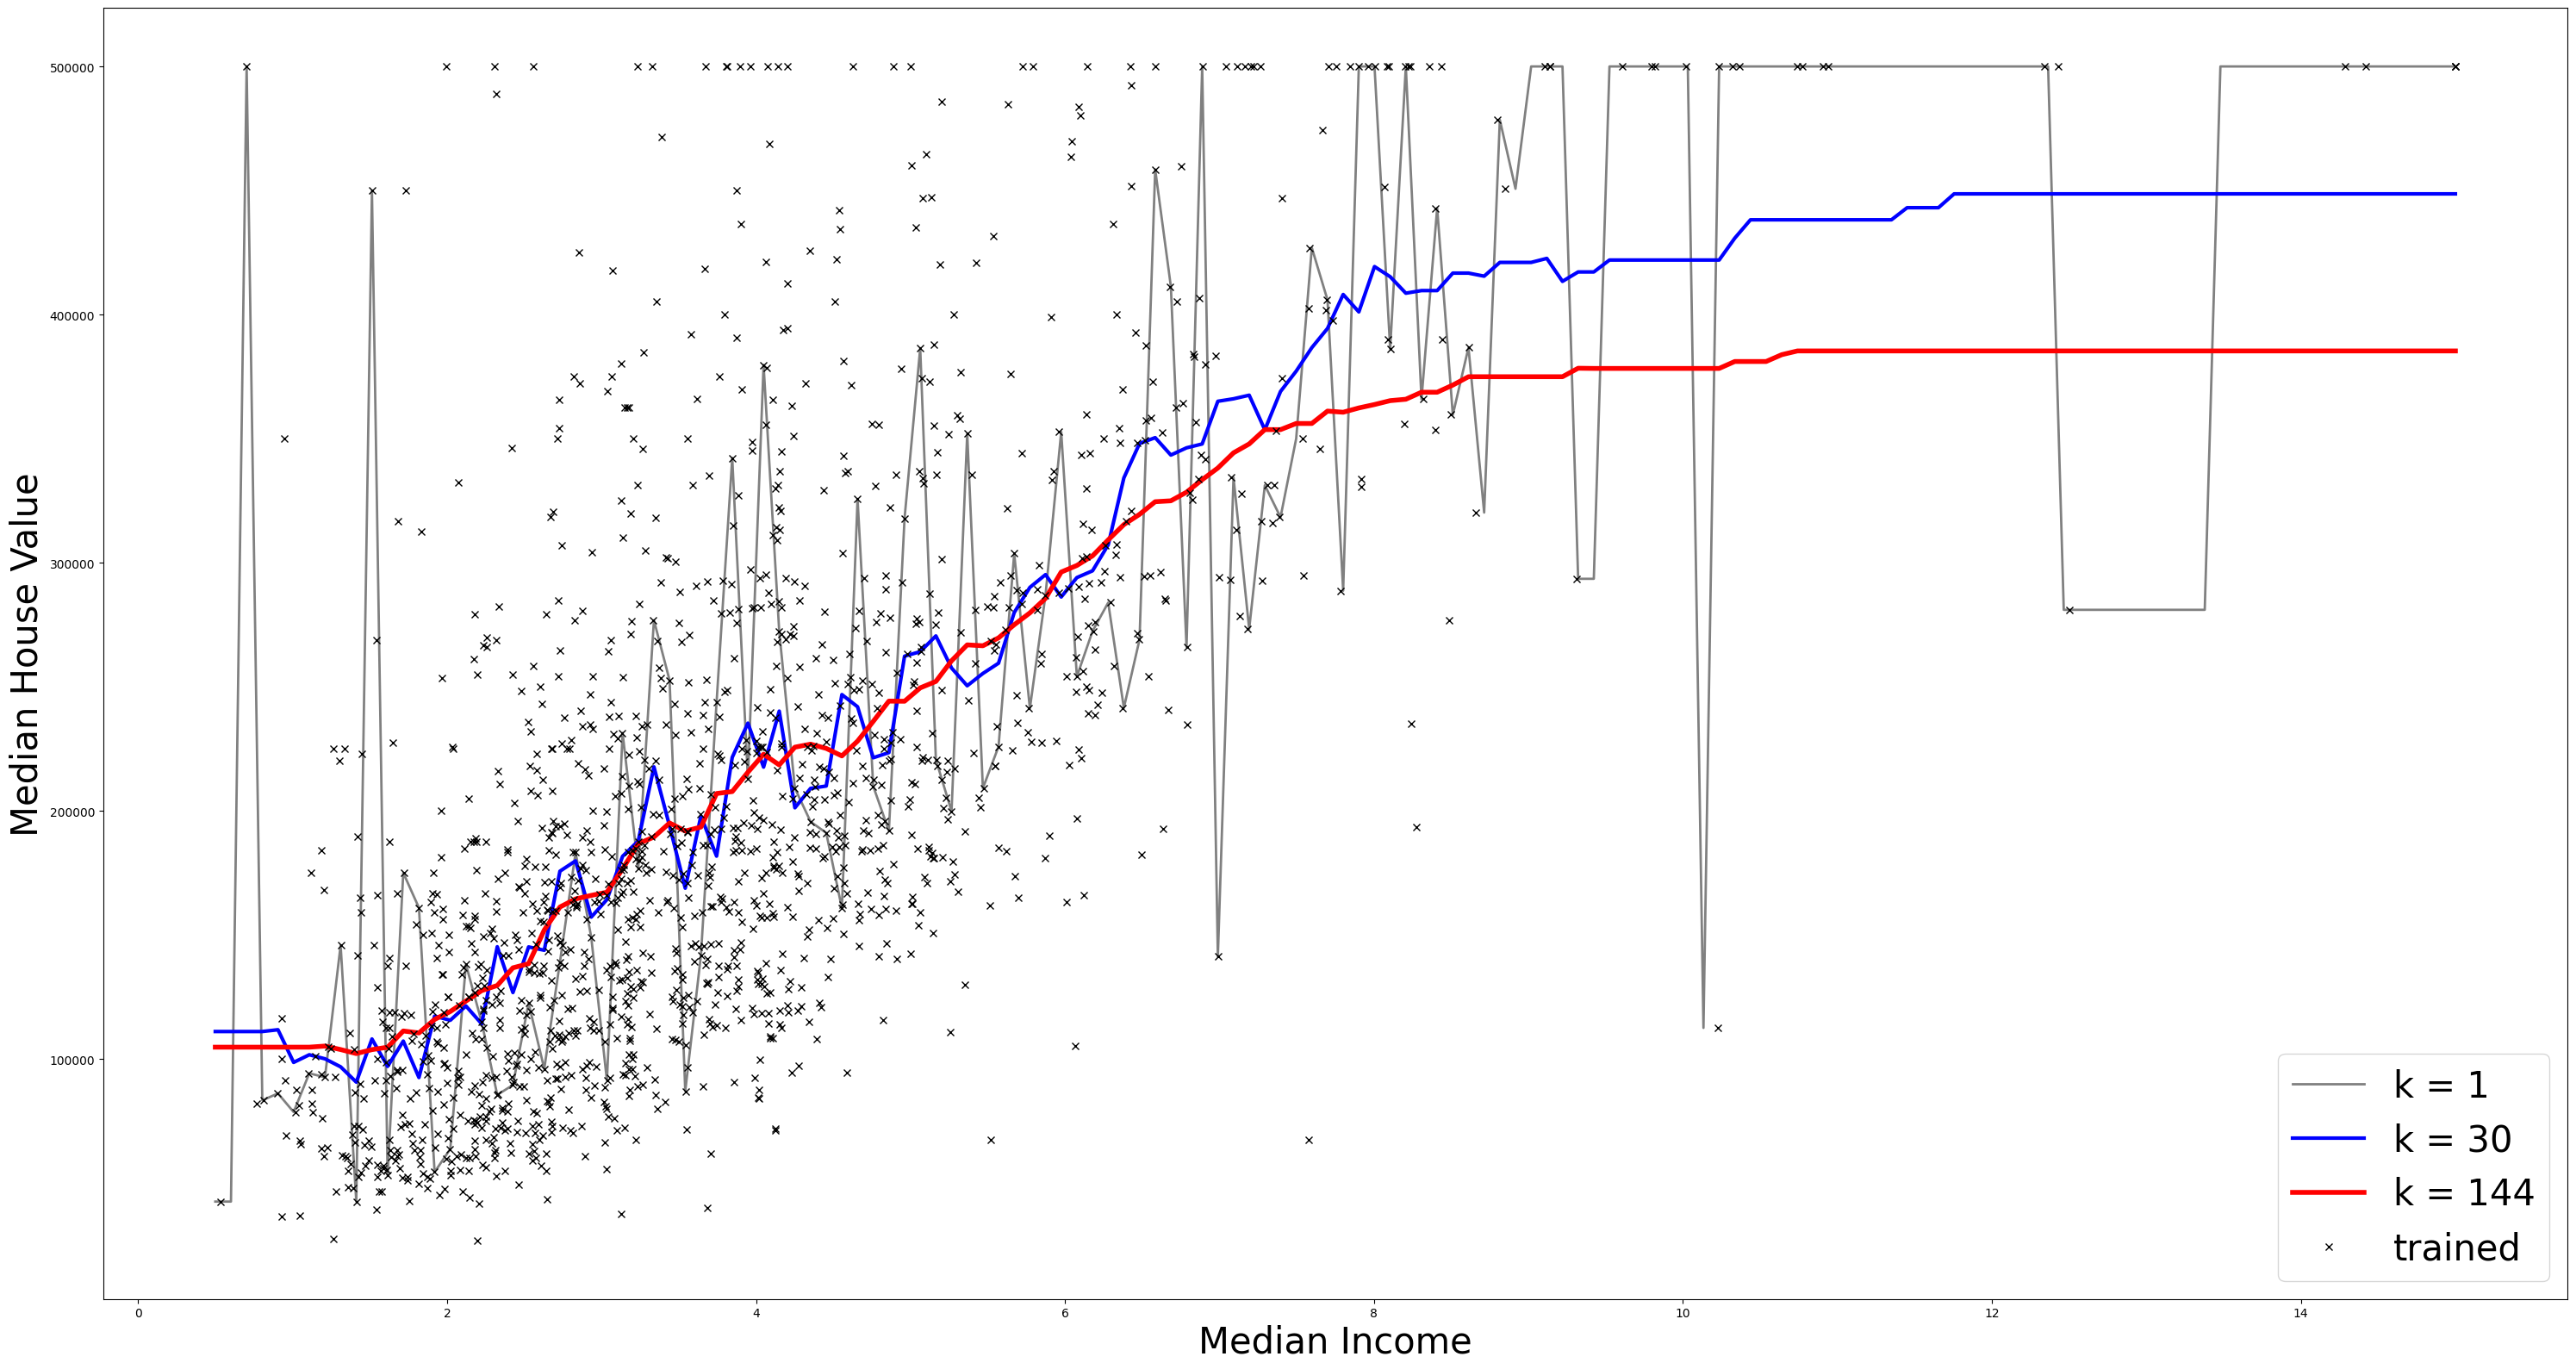

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_randomed, y_randomed, test_size = 0.2, random_state = 40)
#I chose a K-value of 144 as the max because it is the square root of the total population
k_list = np.linspace(1, 200, 200)

fig, ax = plt.subplots(figsize=(30,16))
k_dict = {}
i = 0 
#loop through out k list
for k in k_list:
    model=KNeighborsRegressor(n_neighbors=int(k))
    #train our model
    model.fit(x_train, y_train)

    #fit model with test data
    y_pred = model.predict(x_test)
    color = ['gray', 'blue', 'red']
    if k in [1,30,144]:
        xnew = np.linspace(x_randomed.min(), x_randomed.max(), 144)
        ynew = model.predict(xnew)
        ax.plot(xnew, ynew, '-', label = f'k = {int(k)}', linewidth = i+2, color = color[i])
        i+=1
    #storing MSE values
    MSE = mean_squared_error(y_test, y_pred)
    k_dict[k] = MSE 

ax.plot(x_train, y_train, 'x', label ='trained', color='k')
ax.set_xlabel('Median Income', fontsize = 30)
ax.set_ylabel('Median House Value', fontsize = 30)
plt.tight_layout()
ax.legend (loc = 'lower right', fontsize = 30)
plt.show()

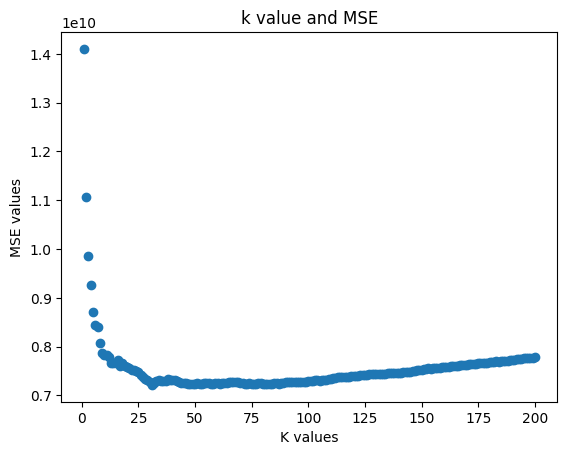

In [27]:
plt.scatter(list(k_dict.keys()),list(k_dict.values()))
plt.xlabel('K values')
plt.ylabel('MSE values')
plt.title('k value and MSE')
plt.show()

Hệ số K sẽ tỉ lệ nghịch với độ sai lệch => K càng cao model càng chính xác cho tới K = 50

In [28]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.4860454791368032
